# Project 4
## William Pulkownik
## Sp20-Stats-M.Smith

In [2]:
#import the libraries!
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
# fancy stats tools
import scipy.stats as stats
from scipy.stats import norm


## 1)

In [3]:
x = np.linspace(0,1,100)
def a(x):
    return np.exp(-10*x) * 10
integrate.quad(a, 0, np.inf)

(1.0000000000000075, 1.134656220602671e-08)

The function is not a probabilty function for a continuous random variable, based on the output, but it is so close that I think it might be a computer thing

In [4]:
def b(x):
    return np.exp(-.1*x) * 10
integrate.quad(b, 0, np.inf)

(100.0, 1.0187056346358016e-07)

The function is not a probabilty density function for a continuous random variable

In [5]:
def c(x):
    return np.exp(-.3*x) * 0.3
integrate.quad(c, 0, np.inf)

(1.0, 6.511749488981415e-12)

The function __is__ a probabilty density function for a continuous random variable

In [6]:
d = lambda x: 1/5 if (x>=0 and x<5) else 0
integrate.quad(d, 0, 5)

(1.0000000000000002, 1.1102230246251569e-14)

Not sure about this one. In my head it makes sense that it would be 1.0 under the curve but the comp seems to think there is a bit more in there.

In [7]:
e = lambda x: x if (x>=0 and x<np.sqrt(2)) else 0
integrate.quad(e, 0, 5)

(0.9999999990316069, 1.3097361301672826e-08)

Again I believe this may be a probability density function for a continuous random variable

### 2)
Based on the previous problems the functions with form 
$$f(t)=\begin{cases} \ {ae^{-at}} & x>0, \\ 0 & x \leq 0. \end{cases}$$ 
are probability density functions for continuous random variables

### 3) from the selected previous functions: Graph each, shade AUC between .5 and 1.25, use python to calculate the AUC
##### <font color=firebrick>Function (c)</font>

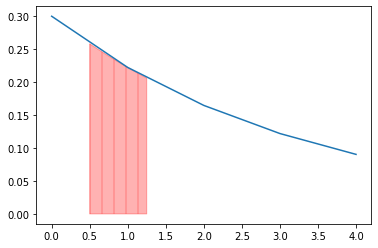

(0.17341869763408563, 1.9253343101387004e-15)

In [8]:
x = np.arange(0, 5) 
plt.plot(x, c(x))

#This will allow us to shade the area under a specific part of 
#the curve.
x_sub = np.arange(0.5, 1.25, 0.001)
plt.fill_between(x_sub, c(x_sub), color = "red",alpha = .3, hatch = '|')
plt.show()

# This will allow us to find the area for the region we shaded. Don't forget to change your bounds if needed!
integrate.quad(c, 0.5, 1.25)

####  <font color=firebrick>function (d)</font>

/home/mongoose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


(0.15000000000000002, 1.665334536937735e-15)

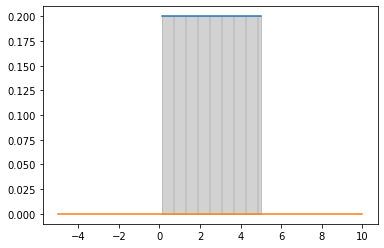

In [9]:
d = lambda x: 1/5*x/x

x = np.linspace(0,5)
plt.plot(x, d(x))

x_all = np.linspace(-5, 10)
plt.plot(x_all, 0*x_all)
plt.fill_between(x, d(x), color = "gray",alpha = 0.35, hatch = '|')

integrate.quad(d, 0.5, 1.25)

function (e)

(0.65625, 7.28583859910259e-15)

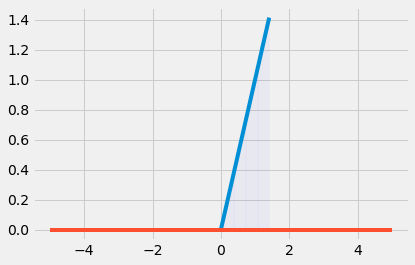

In [14]:
e = lambda x: x
sqrt = np.sqrt(2)  
x = np.linspace(0,sqrt)
plt.plot(x, e(x))
x_all = np.linspace(-5,5)
plt.plot(x_all, 0*x_all)
plt.fill_between(x, e(x), color = "blue",alpha = 0.03, hatch = '|')


# This will allow us to find the area for the region we shaded. Don't forget to change your bounds if needed!
integrate.quad(e, 0.5, 1.25)

### 4) for the standard normal curve, do the following

a)graph the curve
b)shade area between z=-1.5 and z=2.25
c)find that area between z scores

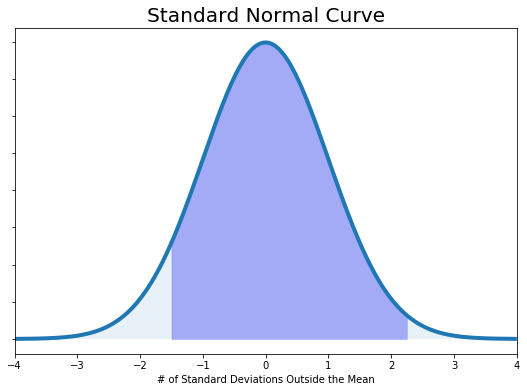

In [11]:
x = np.arange(-1.5, 2.25, 0.001)
x_all = np.arange(-10, 10, 0.001) # entire range of x
y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)
# build the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x_all,y2)

ax.fill_between(x,y,0, alpha=0.3, color='b')
ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([-4,4])
ax.set_xlabel('# of Standard Deviations Outside the Mean')
ax.set_yticklabels([])
ax.set_title('Standard Normal Curve')

plt.show()

In [12]:
AUC = stats.norm.cdf(2.25, 0, 1) - stats.norm.cdf(-1.5, 0, 1)
AUC

0.9209683260760972

### 5) recent study from CDC, diastolic bp for women is approximately normally distributed with 
$$\mu = 80.5 
\sigma = 9.9$$
#### a) graph this distribution

#### b) what proportion of women have a blood pressure lower than 70? Provide the python code and graph for this area

#### c) a reading of greater than 90 is hypertension. What proportion of women have hypertension? Provide code and graph this area

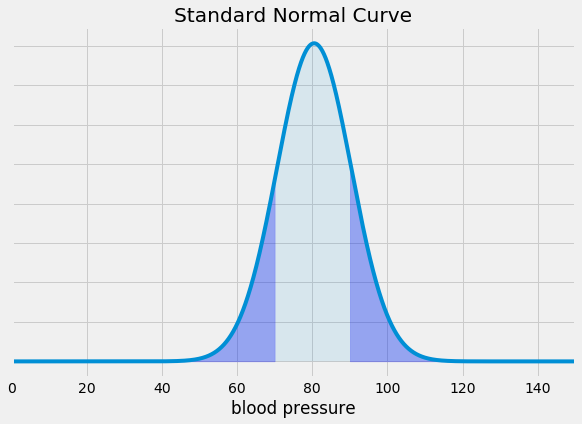

In [17]:
mu = 80.5
sigma = 9.9
x1 = 70
x2 = 90
#transform stats into z-scores
z1 = 1.96
z2 = -1.96


xLow = np.arange(0, x1, 0.01)
xHi = np.arange(x2, 175, 0.01)
x_all = np.arange(0, 175, 0.01) # entire range of x
yLow = norm.pdf(xLow,mu,sigma)
yHi = norm.pdf(xHi,mu,sigma)
y2 = norm.pdf(x_all,mu,sigma)
# build the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x_all,y2)

ax.fill_between(xLow,yLow,0, alpha=0.3, color='b')
ax.fill_between(xHi,yHi,0, alpha=0.3, color='b')
ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([0,150])
ax.set_xlabel('blood pressure')
ax.set_yticklabels([])
ax.set_title('Standard Normal Curve')

plt.show()

#### proportion of women with diastolic pressure under 70:

In [18]:
area_under_curve = stats.norm.cdf(z1, 0, 1)
area_under_curve

0.9750021048517795

#### proportion of women with Diastolic BP over 90:

In [19]:
area_under_curve = stats.norm.cdf(np.inf, 0, 1) - stats.norm.cdf(z2,0,1)
area_under_curve

0.9750021048517795